# Brain Tumor Detection with CNN | Beginner Friendly

**1. Importing the Libraries**

**2. Downloading the Images**

**3. Data Visualization**

**4. Split the Data**

**5. Preprocessing**

**6. Data Augmentation**

**7. CNN Model**

**8. Results**

In [50]:
!pip install pillow

# 1. Importing the Libraries

In [51]:
# import numpy as np
# import pandas as pd
# import os
# from PIL import Image
# from sklearn.model_selection import train_test_split
# import seaborn as sns
# import matplotlib.pyplot as plt
# import cv2
# import tensorflow as tf
# import tensorflow 
# from tensorflow import keras
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
# from keras.utils import to_categorical
# from sklearn.metrics import confusion_matrix
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator


import numpy as np
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# 2. Downloading the Images

In [52]:
data = []
labels = []

for tumor_type in ['no', 'yes']:
    for r, d, f in os.walk(f"Dataset/brain_tumor_dataset/{tumor_type}"):
        for file in f:
            if '.jpg' in file:
                
                # image path
                path = os.path.join(r, file)
                
                # read the image and resize
                img = Image.open(path)
                img = img.resize((128,128))
                img = np.array(img)
                
                # if the size of the image is true
                if img.shape == (128,128,3):
                    data.append(img)
                    
                    label = 0 if tumor_type == 'yes' else 1
                    labels.append(label)

In [53]:
data = np.array(data)
print(data.shape)

(139, 128, 128, 3)


In [54]:
labels = np.array(labels)
print(labels.shape)

(139,)


# 3. Data Visualization

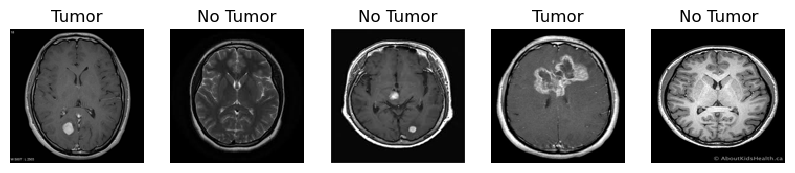

In [55]:
num_samples_to_display = 5
random_indices = np.random.choice(len(data), num_samples_to_display, replace=False)

plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(data[idx], interpolation='nearest')
    plt.title('Tumor' if labels[idx] == 0 else 'No Tumor')
    plt.axis('off')
plt.show()

# 4. Split the Data

In [56]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size= 0.3, random_state= 42)

In [57]:
print(x_train.shape)
print(x_test.shape)

(97, 128, 128, 3)
(42, 128, 128, 3)


## Data Distribution 

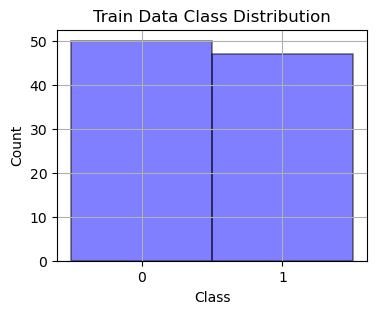

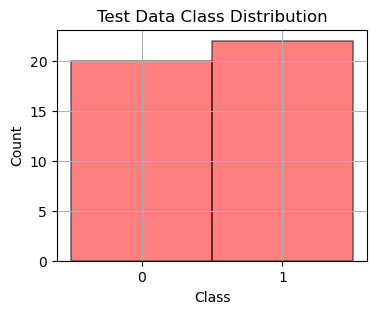

In [58]:
#Train
plt.figure(figsize=(4, 3))
plt.hist(y_train, bins=np.arange(3)-0.5, alpha=0.5, color='blue', edgecolor='black', linewidth=1.2)
plt.xticks([0, 1])  
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Train Data Class Distribution')
plt.grid(True)
plt.show()

#Test
plt.figure(figsize=(4, 3))
plt.hist(y_test, bins=np.arange(3)-0.5, alpha=0.5, color='red', edgecolor='black', linewidth=1.2)
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Test Data Class Distribution')
plt.grid(True)
plt.show()

# 5. Preprocessing

In [59]:
def preProcess(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    
    return img

In [60]:
x_train = np.array(list(map(preProcess, x_train)))
x_test = np.array(list(map(preProcess, x_test)))

In [61]:
x_train = x_train.reshape(-1, 128, 128,1)
x_test = x_test.reshape(-1, 128, 128,1)

# 6. Data Augmentation

In [62]:
dataGen = ImageDataGenerator(width_shift_range= 0.1,
                             height_shift_range= 0.1,
                             zoom_range= 0.1,
                             rotation_range= 10)

In [63]:
dataGen.fit(x_train)

In [64]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

# 7. CNN Model

In [65]:
model = Sequential()
model.add(Conv2D(32,input_shape = (128,128,1), kernel_size = (5,5), activation="relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units= 2, activation="softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = ("Adam"), metrics=["accuracy"])

In [66]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 6s 1s/step - loss: 0.7164 - accuracy: 0.4227 - val_loss: 0.6885 - val_accuracy: 0.5952
Epoch 2/30
3/3 [==============================] - 2s 533ms/step - loss: 0.6818 - accuracy: 0.6907 - val_loss: 0.6819 - val_accuracy: 0.5476
Epoch 3/30
3/3 [==============================] - 2s 536ms/step - loss: 0.6564 - accuracy: 0.6804 - val_loss: 0.6627 - val_accuracy: 0.5714
Epoch 4/30
3/3 [==============================] - 2s 546ms/step - loss: 0.6183 - accuracy: 0.6392 - val_loss: 0.7096 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 2s 769ms/step - loss: 0.5889 - accuracy: 0.7216 - val_loss: 0.6523 - val_accuracy: 0.6190
Epoch 6/30
3/3 [==============================] - 2s 515ms/step - loss: 0.5478 - accuracy: 0.7216 - val_loss: 0.6749 - val_accuracy: 0.6429
Epoch 7/30
3/3 [==============================] - 2s 496ms/step - loss: 0.5123 - accuracy: 0.7423 - val_loss: 0.6856 - val_accuracy: 0.5952
Epoch 8/30
3/3 [=======

# 8. Results

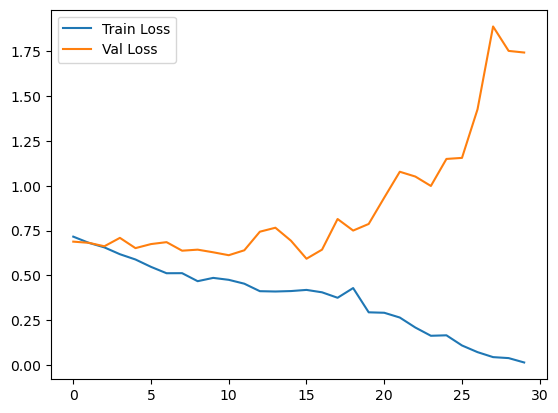

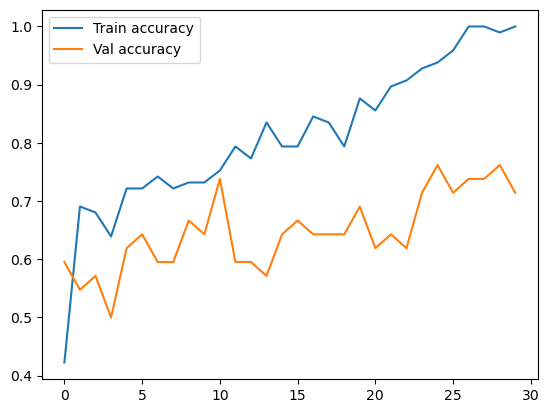

In [67]:
plt.figure()
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Val Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["accuracy"], label = "Train accuracy")
plt.plot(history.history["val_accuracy"], label = "Val accuracy")
plt.legend()
plt.show()

In [68]:
score = model.evaluate(x_test,y_test, verbose = 1)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

2/2 [==============================] - 0s 42ms/step - loss: 1.7431 - accuracy: 0.7143
Test loss:  1.743080496788025
Test accuracy:  0.7142857313156128


2/2 [==============================] - 0s 39ms/step


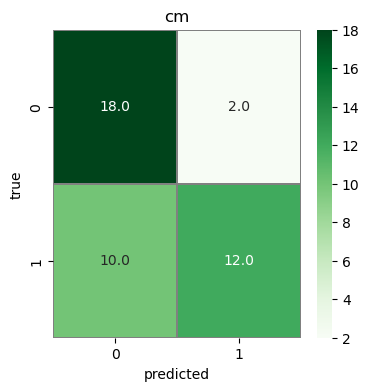

In [69]:
import seaborn as sns

y_pred = model.predict(x_test)

y_pred_class = np.argmax(y_pred, axis = 1)

Y_true = np.argmax(y_test, axis= 1)

cm = confusion_matrix(Y_true, y_pred_class)

f, ax = plt.subplots(figsize = (4,4))
sns.heatmap(cm, annot= True, linewidths= 0.01, cmap = "Greens", linecolor="gray", fmt= ".1f", ax = ax)
plt.xlabel("predicted")
plt.ylabel("true")
plt.title("cm")
plt.show()

In [70]:
import pickle

pickle.dump(model, open('image_classification_model.pkl', 'wb'))

In [71]:
loaded_model = pickle.load(open('image_classification_model.pkl', 'rb'))

In [78]:
from PIL import Image
import numpy as np

def preprocess_image(image_path):
    # Open the image file
    image = Image.open(image_path)
    # Convert the image to grayscale
    image = image.convert('L')
    # Resize the image to the required input size of the model
    image = image.resize((128, 128))
    # Convert the image to a NumPy array
    image_array = np.array(image)
    # Normalize the pixel values (if required)
    image_array = image_array / 255.0  # Adjust normalization according to your model
    # Expand the dimensions to match the model's input shape
    image_array = np.expand_dims(image_array, axis=-1)
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

# Provide the path to the image you want to classify
image_path = 'Dataset/brain_tumor_dataset/yes/Y20.jpg'

# Preprocess the input image
input_image = preprocess_image(image_path)

# Step 5: Use the loaded model to predict the class label of the input image
predicted_class = loaded_model.predict(input_image)
print(predicted_class)

1/1 [==============================] - 0s 27ms/step
[[9.9995565e-01 4.4326109e-05]]


In [79]:
# Assuming predicted_class is the output of your model
threshold = 0.5  # Adjust the threshold as needed

if predicted_class[0][1] < threshold:
    print("Yes, the image has a brain tumor")
else:
    print("No, the image does not have a brain tumor")

Yes, the image has a brain tumor
